<a href="https://colab.research.google.com/github/Shubham1966/PRODIGY_DS_04/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Q: Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

## Load data without considering first row as header
train_data = pd.read_csv('twitter_training.csv', header=None)
validation_data = pd.read_csv('twitter_validation.csv', header=None)

In [44]:
## Rename columns for clarity
train_data.columns = ['ID', 'Topic', 'Sentiment', 'Text']
validation_data.columns = ['ID', 'Topic', 'Sentiment', 'Text']

In [45]:
## Handle missing values by replacing NaN with empty strings
train_data['Text'].fillna('', inplace=True)
validation_data['Text'].fillna('', inplace=True)

In [46]:
## Sentiment Analysis
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['Text'])
y_train = train_data['Sentiment']

X_validation = vectorizer.transform(validation_data['Text'])
y_validation = validation_data['Sentiment']

In [47]:
## Train SVM classifier
svm_classifier = LinearSVC()
svm_classifier.fit(X_train, y_train)

LinearSVC()

In [48]:
## Evaluate on validation set
y_pred = svm_classifier.predict(X_validation)
print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.85      0.78      0.81       172
    Negative       0.83      0.91      0.87       266
     Neutral       0.88      0.78      0.83       285
    Positive       0.81      0.87      0.84       277

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



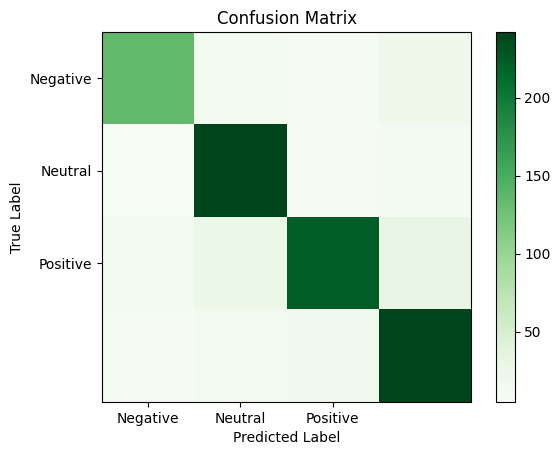

In [62]:
## Confusion Matrix
conf_matrix = confusion_matrix(y_validation, y_pred)
plt.imshow(conf_matrix, cmap='Greens', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.yticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.show()

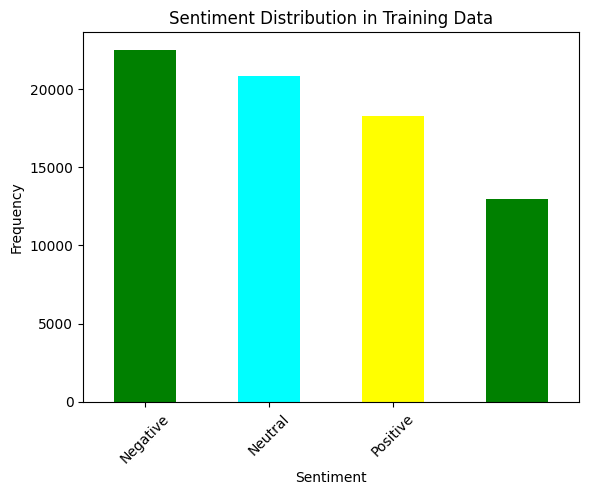

In [64]:
## Visualization
sentiment_distribution = train_data['Sentiment'].value_counts()
sentiment_distribution.plot(kind='bar', color=['green', 'cyan', 'yellow'])
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'], rotation=45)
plt.show()